<a href="https://colab.research.google.com/github/Kaiziferr/statistics/blob/main/statistics/descriptive_statistics/01_workshop_estadistica_descriptiva_datos_agrupados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabla de frecuencia**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## **Problema II**
---
Suponga que un instituto técnico enfrenta problemas financieros y
plantea un aumento en el costo de las matrículas. Es claro que ante
un aumento del valor de la matrícula, los estudiantes que no tengan
capacidad de pago pueden retirarse del instituto, lo que representa
una perdida económica para este. Por esta razón es necesario que el
instituto conozca el nivel de ingreso de los estudiantes para decidir
sobre el aumento que no cause una deserción estudiantil.
Con el fin de conocer el nivel de ingreso de los estudiantes, el instituto
planteó una encuesta donde 126 estudiantes suministraron el valor de
sus ingresos mensuales.



In [2]:
data = [572.30,   748.10,   769.00,   839.00,   878.10,   955.50,   963.40,   965.70,   983.80,
985.30,   1002.80,  1005.70,  1013.20,  1017.80,  1019.40,  1030.00,  1036.80,  1056.60,
1061.20,  1067.20,  1075.70,  1081.80,  1100.80,  1102.00,  1120.70,  1127.10,  1135.40, 
1170.20,  1179.60,  1195.10,  1208.20,  1221.70,  1228.60,  1234.00,  1247.90,  1249.80,
1272.00,  1274.70,  1299.80,  1304.00,  1312.90,  1340.80,  1350.30,  1352.90,  1374.80,
1406.10,  1409.30,  1412.60,  1418.40,  1426.90,  1427.60,  1433.30,  1441.10,  1443.80,
1459.50,  1460.10,  1477.60,  1484.90,  1491.70,  1500.20,  1500.60,  1500.60,  1506.40,
1531.60,  1540.20,  1544.40,  1552.80,  1552.90,  1557.80,  1563.70,  1564.20,  1569.40,
1581.30,  1593.40,  1594.80,  1595.20,  1605.20,  1620.60,  1626.80,  1626.80,  1648.20,
1670.70,  1687.40,  1694.30,  1711.80,  1721.40,  1731.90,  1738.30,  1738.80,  1746.90,
1777.90,  1817.00,  1846.70,  1851.70,  1857.50,  1891.80,  1898.10,  1901.40,  1930.80,
1940.30,  1954.10,  1957.30,  1974.00,  1986.30,  2002.70,  2053.70,  2065.50,  2065.90,
2107.70,  2114.00,  2120.40,  2136.80,  2212.50,  2265.80,  2273.70,  2280.20,  2297.00,
2330.60,  2535.60,  2643.10,  2723.70,  2725.20,  2956.40,  3197.40,  3234.70,  3467.80]

In [3]:
def intervalos_clase(data_size:int)->tuple:
  """Calcula de tre formas el numero de intervalos"""
  m1 = 1+3.3*np.log10(data_size)
  m2 = np.log(data_size)/np.log(2)
  m3 = np.sqrt(data_size)
  m = int(np.ceil(min([m1, m2, m3])))
  return m, m1, m2, m3 

In [4]:
m, m1, m2, m3 = intervalos_clase(len(data))
print(f'Metodo 1: {m1}\nMetodo 2: {m2}\nMetodo 3: {m3}')
data = pd.Series(data)
rango = data.max() - data.min()
amplitud =  round(rango / m, 1)
print(f"Número de intervalos: {m}", f"Amplitud: {amplitud}", sep="\n")

Metodo 1: 7.931222798887958
Metodo 2: 6.977279923499917
Metodo 3: 11.224972160321824
Número de intervalos: 7
Amplitud: 413.6


In [5]:
table_frecuency = pd.DataFrame(index=['1','2','3','4','5','6', '7'])
xi = [round(min(data)+amplitud*i,3) if i!=m else data[-1:].values[0] for i in range(m+1) if i <= m ]
table_frecuency['xi'] = [(xi[i],xi[i+1]) for i in range(m)]
table_frecuency['ni'] = [data[data.between(table_frecuency['xi'][i][0], table_frecuency['xi'][i][1])].count() for i in range(m)]
table_frecuency['fi'] = round(table_frecuency['ni']/len(data), 3)
table_frecuency['Ni'] = table_frecuency['ni'].cumsum()
table_frecuency['Fi'] = round(table_frecuency['fi'].cumsum(), 3)
temp = pd.Series(table_frecuency['Fi'])
temp[-1] = 1
table_frecuency['Fi'] = temp
table_frecuency["x'"] = list(map(lambda x: round((x[0]+x[1])/2, 2) , table_frecuency['xi']))
table_frecuency

,xi,ni,fi,Ni,Fi,x'
1,"(572.3, 985.9)",10,0.079,10,0.079,779.10
2,"(985.9, 1399.5)",35,0.278,45,0.357,1192.70
3,"(1399.5, 1813.1)",46,0.365,91,0.722,1606.30
4,"(1813.1, 2226.7)",22,0.175,113,0.897,2019.90
5,"(2226.7, 2640.3)",6,0.048,119,0.945,2433.50
6,"(2640.3, 3053.9)",4,0.032,123,0.977,2847.10
7,"(3053.9, 3467.8)",3,0.024,126,1.000,3260.85


¿Cómo se interpreta f4?
- El 17.5% de los estudiantes tiene un ingreso mensual entre $ 1'813.100, y 2'226.700

¿Cómo se interpreta N5?
- 119 estudiantes tienen un ingreso mensual e inferior a $2'640.300

El instituto conoce que con el aumento los estudiantes con ingresos
superiores a $2’000.000 no tendrán dificultad para pagar el costo de
la nueva matrícula, entonces sería bueno determinar, a partir de los
resultados de la muestra, cuantos de estos estudiantes pueden ayudar
a los directivos del instituto a prever los efectos del aumento.

La función empírica de distribución acumulativa describe de forma general, para cualquier $x$, el porcentaje de datos que son menores o iguales que $x$. Se denota por $F(x)$ y se plantea como: 

$F(x) = F(L_{i-1}) + \frac{f_i}{c}(x-L_{i-1})$


In [6]:
def ojiva_plot(table_frecuency, title:str, x_label:str, figsize_x:int=8, figsize_y:int=6, fontsize:int=15)->None:
  """Grafica la Ojiva frecuencias relativas acumuladas"""
  fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
  fig.suptitle(title, fontsize=fontsize)
  ax.plot(table_frecuency['Fi'], marker='o', color='blue', mfc='r', mec='black')
  ax.set_ylabel('Fi',size = fontsize-3)
  ax.set_xlabel(x_label, size = fontsize-3)
  ax.set_xticklabels([table_frecuency['xi'][i][1] for i in range(m)],fontsize=fontsize-3, rotation=90)
  plt.show()

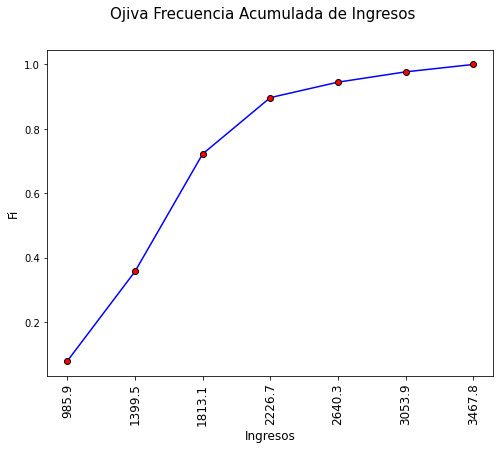

In [7]:
ojiva_plot(table_frecuency, 'Ojiva Frecuencia Acumulada de Ingresos', 'Ingresos')

In [8]:
def search_intervalo(valor:int, table_frecuency)->tuple:
  """Busca un valor en los intervalos"""
  for i, x in enumerate(table_frecuency['xi']):
    if valor >= x[0] and valor < x[1]:
      F_0 = table_frecuency['Fi'][i-1]
      f = table_frecuency['fi'][i]
      return F_0, f, x[0]

In [9]:
def calculate_function_empiric(valor, amplitud:float, table_frecuency)->int:
  """Calcula la funcion empirica"""
  F_0, f, li_1 = search_intervalo(valor, table_frecuency)
  F = F_0 + (f/amplitud)*(valor-li_1)
  return round(F, 2)

A partir de la tabla de frecuencias


In [10]:
table_frecuency

,xi,ni,fi,Ni,Fi,x'
1,"(572.3, 985.9)",10,0.079,10,0.079,779.10
2,"(985.9, 1399.5)",35,0.278,45,0.357,1192.70
3,"(1399.5, 1813.1)",46,0.365,91,0.722,1606.30
4,"(1813.1, 2226.7)",22,0.175,113,0.897,2019.90
5,"(2226.7, 2640.3)",6,0.048,119,0.945,2433.50
6,"(2640.3, 3053.9)",4,0.032,123,0.977,2847.10
7,"(3053.9, 3467.8)",3,0.024,126,1.000,3260.85


In [11]:
print("¿Qué porcentaje de estudiantes tienen un ingreso inferior o igual a los $2’000.000?\n")

res = calculate_function_empiric(2000, amplitud, table_frecuency)

print(f"El {res*100}% tiene un ingreso inferior o igual a los 2'000.000")

¿Qué porcentaje de estudiantes tienen un ingreso inferior o igual a los $2’000.000?

El 80.0% tiene un ingreso inferior o igual a los 2'000.000


In [12]:
print("¿Qué porcentaje de estudiantes tienen un ingreso superior a $1’400.000?\n")

res = calculate_function_empiric(1400, amplitud, table_frecuency)
res = 1 - res

print(f"El {res*100}% tiene un ingreso superior a los $1’400.000")

¿Qué porcentaje de estudiantes tienen un ingreso superior a $1’400.000?

El 64.0% tiene un ingreso superior a los $1’400.000


In [13]:
print("¿Qué porcentaje de estudiantes tienen un ingreso entre $2’700.000 y $3’200.000?\n")

resA = calculate_function_empiric(3200, amplitud, table_frecuency)
resB = calculate_function_empiric(2700, amplitud, table_frecuency)
res = round(resA - resB, 2)

print(f"El {res*100}% tiene un ingreso entre $2’700.000 y  $3’200.000")

¿Qué porcentaje de estudiantes tienen un ingreso entre $2’700.000 y $3’200.000?

El 4.0% tiene un ingreso entre $2’700.000 y  $3’200.000


In [14]:
def calculete_value_percent(percent, amplitud, table_frecuency)->int:
  """Calcula el valor apartir de un porcentaje en la frecuencia acumulada"""
  Fi = table_frecuency['Fi']
  for i in range(len(Fi)):
    if percent>Fi[i] and percent<=Fi[i+1]:
      F_0 = table_frecuency['Fi'][i]
      f = table_frecuency['fi'][i+1]
      x = np.trunc(((percent - F_0)*amplitud)/f + table_frecuency['xi'][i+1][0])
      return x

In [15]:
print("¿A partir de que valor de los ingresos se encuentra acumulado el 90 % de los datos?\n")
res = calculete_value_percent(0.9, amplitud, table_frecuency)
print(f"El 90% de los estudiantes tiene un ingreso igual o inferior a ${res} millones")

¿A partir de que valor de los ingresos se encuentra acumulado el 90 % de los datos?

El 90% de los estudiantes tiene un ingreso igual o inferior a $2252.0 millones


¿Cuál es la media aritmética en promedio los estudiantes del instituto?


In [16]:
#Marca de clase
def arithmetic_average(table_frecuency)->float:
  return np.sum(table_frecuency["x'"] * table_frecuency["fi"]) 

In [17]:
table_frecuency

,xi,ni,fi,Ni,Fi,x'
1,"(572.3, 985.9)",10,0.079,10,0.079,779.10
2,"(985.9, 1399.5)",35,0.278,45,0.357,1192.70
3,"(1399.5, 1813.1)",46,0.365,91,0.722,1606.30
4,"(1813.1, 2226.7)",22,0.175,113,0.897,2019.90
5,"(2226.7, 2640.3)",6,0.048,119,0.945,2433.50
6,"(2640.3, 3053.9)",4,0.032,123,0.977,2847.10
7,"(3053.9, 3467.8)",3,0.024,126,1.000,3260.85


In [18]:
print(f"En promedio los estudiantes del instituto tienen un ingreso mensual igual o inferior a ${arithmetic_average(table_frecuency)}")

En promedio los estudiantes del instituto tienen un ingreso mensual igual o inferior a $1619.0771


¿Cuál es la mediana aritmética en promedio los estudiantes del instituto?

In [19]:
print(f"El 50% de los estudiantes del instituto tienen un ingreso mensual igual o inferior a ${calculete_value_percent(0.5, amplitud, table_frecuency)} millones")

El 50% de los estudiantes del instituto tienen un ingreso mensual igual o inferior a $1561.0 millones


¿Cuál es la moda?

In [23]:
table_frecuency

,xi,ni,fi,Ni,Fi,x'
1,"(572.3, 985.9)",10,0.079,10,0.079,779.10
2,"(985.9, 1399.5)",35,0.278,45,0.357,1192.70
3,"(1399.5, 1813.1)",46,0.365,91,0.722,1606.30
4,"(1813.1, 2226.7)",22,0.175,113,0.897,2019.90
5,"(2226.7, 2640.3)",6,0.048,119,0.945,2433.50
6,"(2640.3, 3053.9)",4,0.032,123,0.977,2847.10
7,"(3053.9, 3467.8)",3,0.024,126,1.000,3260.85


In [31]:
def calculate_moda(table_frecuency)->float:
  return table_frecuency[max(table_frecuency["fi"])==table_frecuency["fi"]]["x'"][0]

In [32]:
print(f"El ingreso mensual de los estudiantes del instituto más frecuente se encuentra alrededor de ${calculate_moda(table_frecuency)} millones")

El ingreso mensual de los estudiantes del instituto más frecuente se encuentra alrededor de $1606.3 millones
